In [1]:
from generator import BOTR_Generator
from coco_utils import all_category_names
from utils import imshow, print_pretty

In [2]:
# takes ~7s
botr = BOTR_Generator("dataset/")

loading coco assets - dataset/category_map.pickle
loading coco assets - dataset/coco_organized.pickle
loading coco assets - dataset/annotations/captions_train2017.json
loading annotations into memory...
Done (t=0.89s)
creating index...
index created!


 99%|█████████▉| 0.9787826538085938/0.99 [00:02<00:00,  3.82s/it]  /home/carl/pyenv/lib/python3.8/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
101%|██████████| 0.9956855773925781/0.99 [00:02<00:00,  2.42s/it]


saved image and metadata pair: out/7.png out/7.json


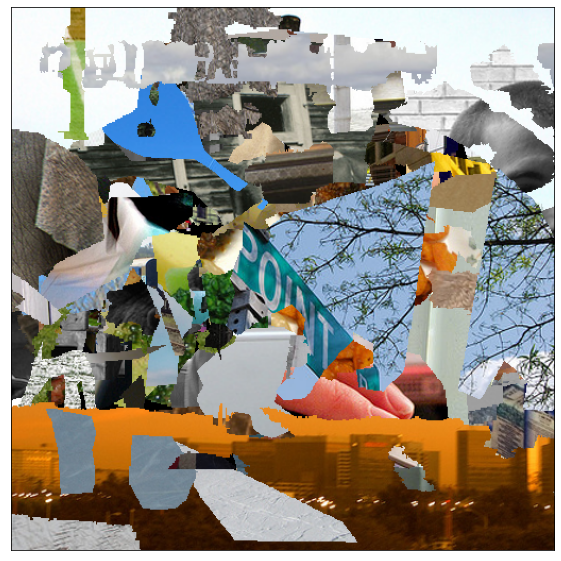

In [3]:
allowedCateg = all_category_names(exclude=['person', 'other'])
# allowedCateg = random.sample(allowedCateg, random.randint(1,len(allowedCateg)))
# allowedCateg = ["sky"]

blendConfig = {
  "use_blending" : False,
  "pyr_kernel_size" : 5,
  "pyr_kernel_sigma" : 1.,
  "mask_kernel_size" : 5,
  "mask_kernel_sigma" : 1.,
  "max_depth" : 5,
  "blur_masks" : True,
  "blur_iters" : 1,
  "plot_levels" : False
}


config = {
  # average size of each patch (1 being mean of distribution)
  'avgPatchSize' : 0.1,
  # average size variance of each patch added
  'avgPatchVariance' : 0.1,
  # minimum area of a patch added, expressed as percentage px after masking
  'minPatchArea' : 0.001, 
  # maximim area of a patch added, expressed as percentage px after masking
  'maxPatchArea' : 0.4, 
  # target percentage of pixels to fill
  'targetFill' : 0.99,
  # output image size
  'outputSize' : (512, 512),
  # prevent supercategories from appearing
  'allowedCategories' : allowedCateg,
  # choose either "stuff_ann", "instance_ann", or "any"
  'ann_key' : "any",
  # image blending options
  'image_blending' : blendConfig
}

image, metadata = botr.generate_botr(config, outpath="out/")
imshow(image, metadata['name'])
print(metadata["description"])